In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('D:/Datasets/Mall_Customers.csv')

# Veri Keşfi

In [2]:
df.head()

CustomerID  Gender  Age  AnnualIncome  SpendingScore
0           1    Male   19         15000             39
1           2    Male   21         15000             81
2           3  Female   20         16000              6
3           4  Female   23         16000             77
4           5  Female   31         17000             40

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID       200 non-null int64
Gender           200 non-null object
Age              200 non-null int64
AnnualIncome     200 non-null int64
SpendingScore    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Boş değer yok. Veri türleri uyumlu.

In [5]:
df.describe()

CustomerID         Age   AnnualIncome  SpendingScore
count  200.000000  200.000000     200.000000     200.000000
mean   100.500000   38.850000   60560.000000      50.200000
std     57.879185   13.969007   26264.721165      25.823522
min      1.000000   18.000000   15000.000000       1.000000
25%     50.750000   28.750000   41500.000000      34.750000
50%    100.500000   36.000000   61500.000000      50.000000
75%    150.250000   49.000000   78000.000000      73.000000
max    200.000000   70.000000  137000.000000      99.000000

In [6]:
# Aykırı değer görünmüyor.

# Analize girecek nitelikleri seçmek

In [7]:
X = df.iloc[:,1:].values

In [8]:
X[:10]

array([['Male', 19, 15000, 39],
       ['Male', 21, 15000, 81],
       ['Female', 20, 16000, 6],
       ['Female', 23, 16000, 77],
       ['Female', 31, 17000, 40],
       ['Female', 22, 17000, 76],
       ['Female', 35, 18000, 6],
       ['Female', 23, 18000, 94],
       ['Male', 64, 19000, 3],
       ['Female', 30, 19000, 72]], dtype=object)

# Cinsiyeti LabelEncoder ile rakamlara çevirme

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder_cinsiyet = LabelEncoder()

In [11]:
X[:,0] = label_encoder_cinsiyet.fit_transform(X[:,0])

In [12]:
X[:3]

array([[1, 19, 15000, 39],
       [1, 21, 15000, 81],
       [0, 20, 16000, 6]], dtype=object)

In [14]:
# Float'a çevirme
X = np.array(X, dtype=float)
X[:3,:]

array([[1.0e+00, 1.9e+01, 1.5e+04, 3.9e+01],
       [1.0e+00, 2.1e+01, 1.5e+04, 8.1e+01],
       [0.0e+00, 2.0e+01, 1.6e+04, 6.0e+00]])

# Standardizasyon (Feature Scaling)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
X[:3]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298]])

# İdeal k sayısını bulmak

In [21]:
from sklearn.cluster import KMeans

In [22]:
wcss = []
kume_sayisi_listesi = range(1, 11)
for i in kume_sayisi_listesi :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    For döngüsü içinde yer alan kodlar neler yapıyor? 
    For döngüsü i değişkeniyle her dönüşünde bir artarak küme sayısını parametre olarak n_clusters’a veriyor. 
    init parametresi ise başlangıç noktalarını seçmek için ideal küme merkezlerini belirliyor, başlangıç noktası tuzağından (random initialization trap) kurtulmak için. kmeans++ parametresi bizi bu tuzaktan kurtaracak iyi başlangıç noktaları seçmemizi sağlıyor. 
    max_iter, algoritmanın nihai durumuna erişmesi için en fazla kaç iterasyon yapabileceğini belirler, varsayılan 300’tür.
    n_init ise küme merkezi başlangıç noktasının kaç farklı noktadan başlayabileceğini belirler. 
    random_state, bu işlemleri uygulayan herkesin aynı sonuçları elde etmesini sağlar. 
    fit() metodu ile model eğitimi gerçekleşir. Parametre olarak daha önce oluşturduğumuz X’i (feature matrix) veriyoruz. 
    for döngüsünden önce oluşturduğumuz wcss listesine kmeans nesnesinin inerita_ özelliğini ekliyoruz. inertia_ Within Clusters Sum of Square (WCSS)  Kümeler içi kareler toplamı.

# Dirsek Metodu (Elbow Method) ile optimal küme sayısı

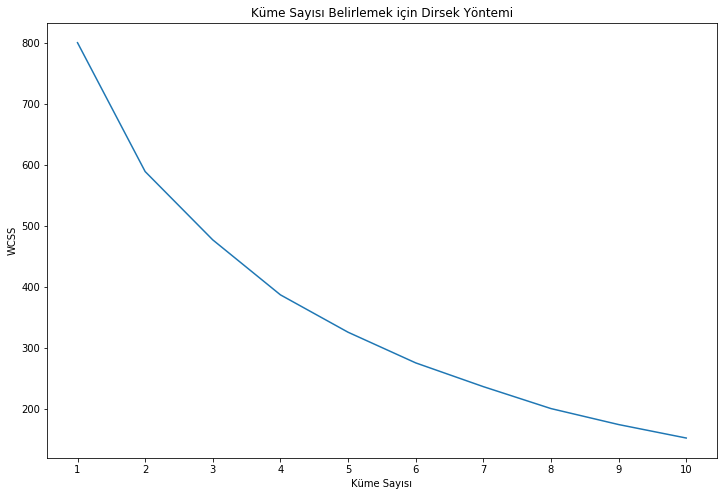

In [23]:
plt.figure(figsize=(12,8))
plt.plot(kume_sayisi_listesi, wcss)
plt.title('Küme Sayısı Belirlemek için Dirsek Yöntemi')
plt.xlabel('Küme Sayısı')
plt.xticks(kume_sayisi_listesi)
plt.ylabel('WCSS')
plt.show()

# Belirlenen küme sayısına göre kümeleme yapmak

In [24]:
# Dirsek yöntemine göre optimal k sayısı 5 görünüyor.
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [25]:
# kmeans nesnesini eğitip hengi müşterinin hangi kümeye dahil olduğunu bulalım.
y_kmeans = kmeans.fit_predict(X)
y_kmeans[:10]

array([4, 4, 2, 0, 2, 0, 2, 0, 1, 0])

# Kim hangi kümede?

In [26]:
# Kimin hangi kümeye düştüğü indeks diziliminden anlaşılır.
# küme merkezlerini (rakam, koordinat değil) dataframe'e ekleyelim.
df['clusters'] = y_kmeans

In [27]:
df.head()

CustomerID  Gender  Age  AnnualIncome  SpendingScore  clusters
0           1    Male   19         15000             39         4
1           2    Male   21         15000             81         4
2           3  Female   20         16000              6         2
3           4  Female   23         16000             77         0
4           5  Female   31         17000             40         2

# Küme merkezleri

In [28]:
kmeans.cluster_centers_

array([[-0.88640526, -0.75387645,  0.00916066,  0.71643426],
       [ 1.12815215,  1.31794399, -0.52575662, -0.44589335],
       [-0.88640526,  0.70840399, -0.5486456 , -0.4086195 ],
       [ 0.27349143,  0.13472565,  1.08669522, -1.29122864],
       [ 1.12815215, -0.74015963,  0.04751628,  0.81127593]])

# Ödev-25

In [1]:
# iris.csv veri setini kullanarak kümeleme yapınız. 
# Bulduğunuz kümeleri çiçek türleriyle karşılaştırınız.